To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

In [164]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [165]:
df = pd.read_csv("data/customer_booking.csv", encoding="ISO-8859-1")

In [166]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [168]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
num_passengers,50000.0,1.591240,1.020165,1.00,1.00,1.00,2.00,9.0
purchase_lead,50000.0,84.940480,90.451378,0.00,21.00,51.00,115.00,867.0
length_of_stay,50000.0,23.044560,33.887670,0.00,5.00,17.00,28.00,778.0
flight_hour,50000.0,9.066340,5.412660,0.00,5.00,9.00,13.00,23.0
wants_extra_baggage,50000.0,0.668780,0.470657,0.00,0.00,1.00,1.00,1.0
wants_preferred_seat,50000.0,0.296960,0.456923,0.00,0.00,0.00,1.00,1.0
wants_in_flight_meals,50000.0,0.427140,0.494668,0.00,0.00,0.00,1.00,1.0
flight_duration,50000.0,7.277561,1.496863,4.67,5.62,7.57,8.83,9.5
booking_complete,50000.0,0.149560,0.356643,0.00,0.00,0.00,0.00,1.0


In [169]:
cat_cols = df.select_dtypes(include="object").columns.to_list()
num_cols = df.select_dtypes(exclude="object").columns.to_list()

In [170]:
df[cat_cols]

,sales_channel,trip_type,flight_day,route,booking_origin
0,Internet,RoundTrip,Sat,AKLDEL,New Zealand
1,Internet,RoundTrip,Sat,AKLDEL,New Zealand
2,Internet,RoundTrip,Wed,AKLDEL,India
3,Internet,RoundTrip,Sat,AKLDEL,New Zealand
4,Internet,RoundTrip,Wed,AKLDEL,India
...,...,...,...,...,...
49995,Internet,RoundTrip,Sat,PERPNH,Australia
49996,Internet,RoundTrip,Sun,PERPNH,Australia
49997,Internet,RoundTrip,Sat,PERPNH,Australia
49998,Internet,RoundTrip,Mon,PERPNH,Australia


In [171]:
df['flight_day'].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [172]:
mapping = {
    "Mon": 0,
    "Tue": 1,
    "Wed": 2,
    "Thu": 3,
    "Fri": 4,
    "Sat": 5,
    "Sun": 6,
}

df["flight_day"] = df["flight_day"].map(mapping)
cat_cols.remove("flight_day")

In [173]:
df['flight_day'].unique()

array([5, 2, 3, 0, 6, 1, 4])

In [174]:
cat_cols = ['sales_channel', 'trip_type']

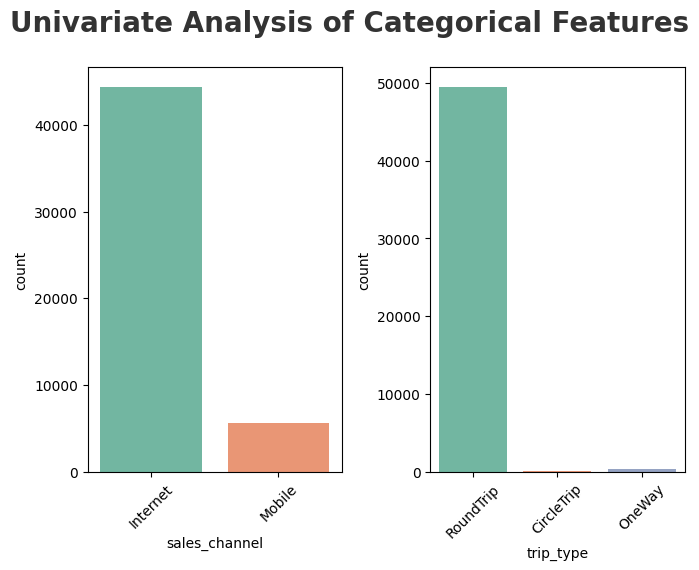

In [175]:
plt.figure(figsize=(7,20))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
for i in range(0, len(cat_cols)):
    plt.subplot(4, 2, i+1)
    sns.countplot(x=df[cat_cols[i]],palette="Set2")
    plt.xlabel(cat_cols[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

### Insights

- Almost All bookings Are of RoundTrip
- All Bookings Were made on Internet

In [176]:
num_cols.append('flight_day')

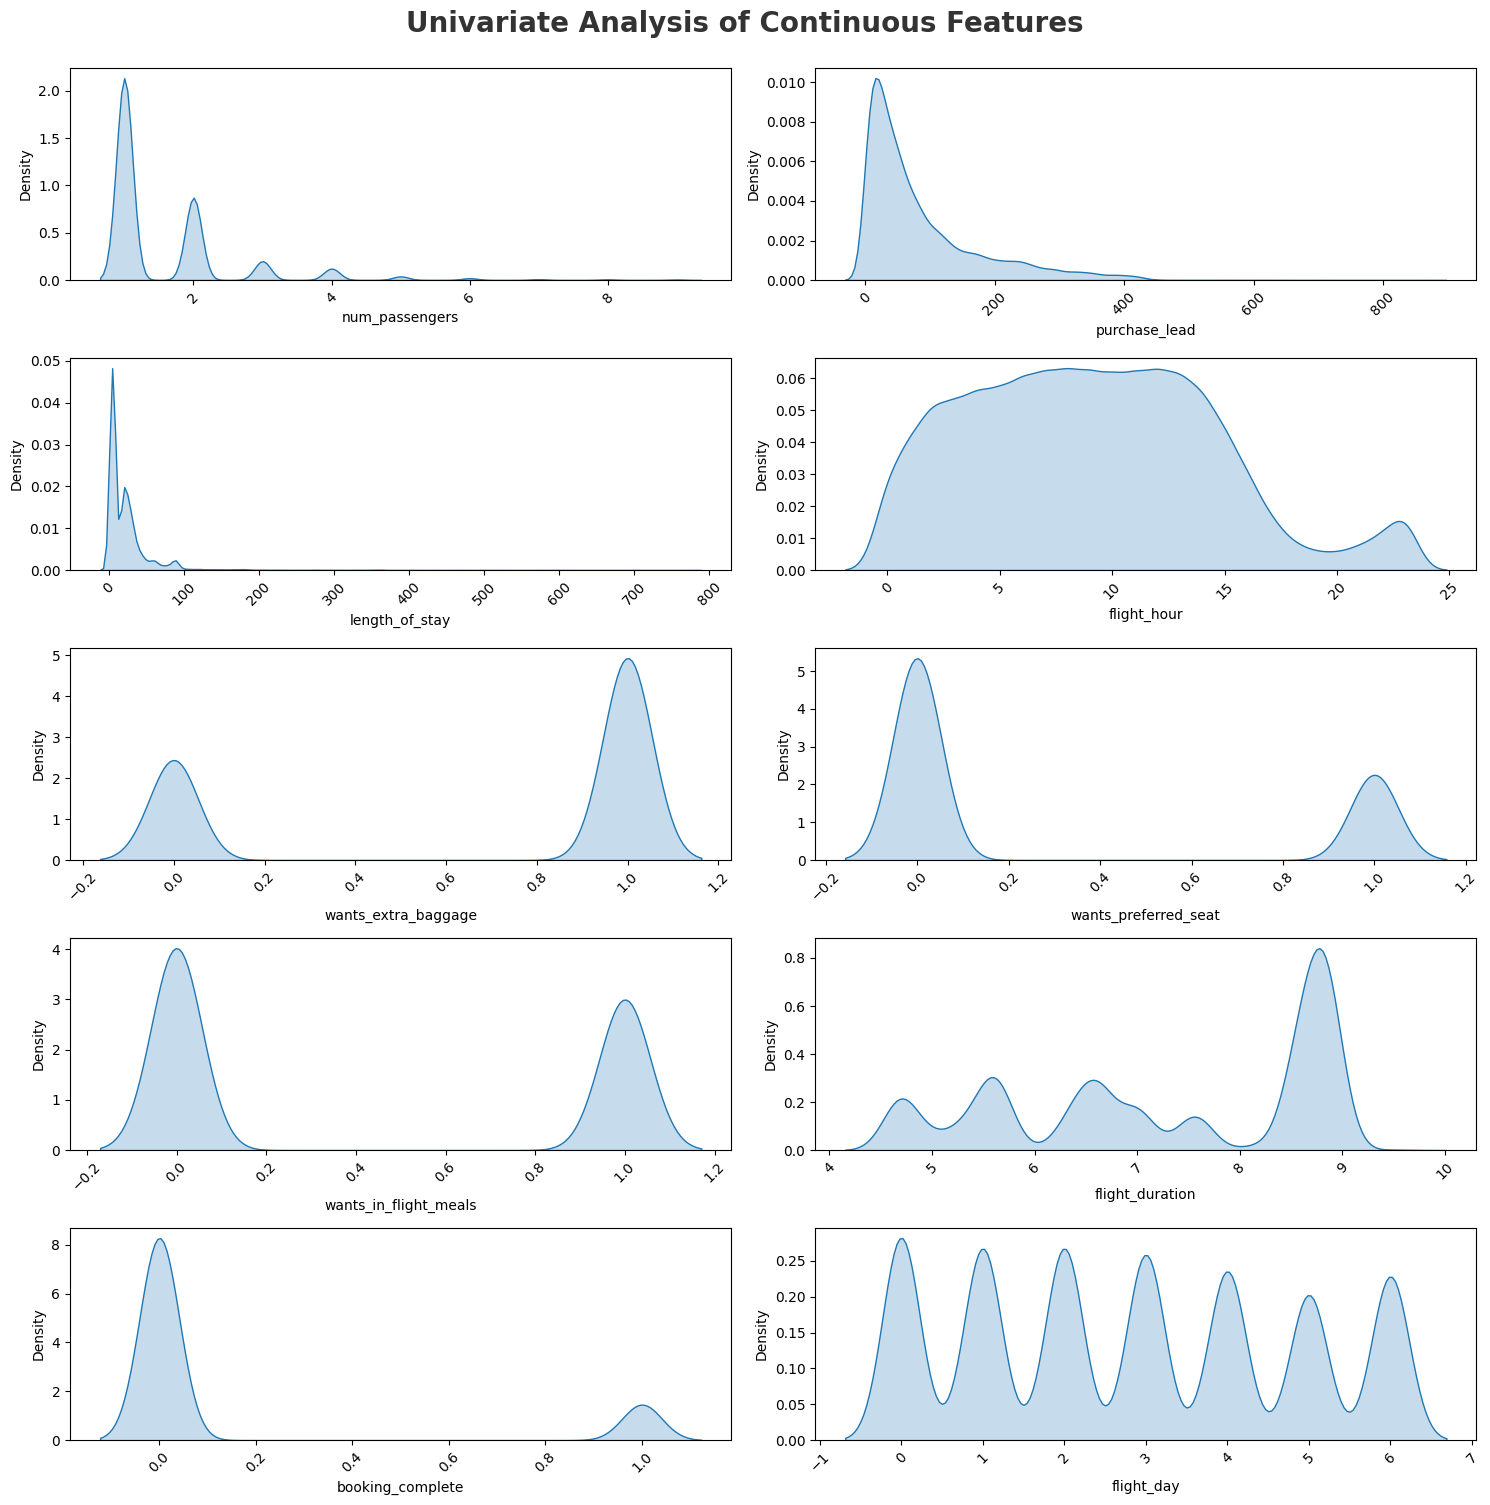

In [177]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Continuous Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(num_cols)):
    plt.subplot(5,2, i+1)
    sns.kdeplot(x=df[num_cols[i]],shade=True,palette="Set2")
    plt.xlabel(num_cols[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

In [178]:
top_10_booking_origin = df.groupby(df['booking_origin']).size().sort_values(ascending=False).head(10)
top_10_booking_origin

booking_origin
Australia      17872
Malaysia        7174
South Korea     4559
Japan           3885
China           3387
Indonesia       2369
Taiwan          2077
Thailand        2030
India           1270
New Zealand     1074
dtype: int64

In [179]:
import plotly.graph_objects as go

# Calculate frequency of each category
category_counts = top_10_booking_origin


# Create an interactive pie chart
fig = go.Figure(
    data=[go.Pie(
        labels=category_counts.keys(), 
        values=category_counts.values, 
        hoverinfo='label+percent+value',  # Customize hover information
        textinfo='label+percent+value',         # Display category and percentage
        textfont_size=15
    )]
)

# Show the chart
fig.show()


#### Insights
Top 10 Origin Of Bookings :
- Australian Books More With Almost 40% Domination Over Sales
- Following Australia Malaysia Have almost 16% of Sales 

In [180]:
top_list =  top_10_booking_origin.keys().to_list()

In [181]:
df['booking_origin'] = np.where(~df['booking_origin'].isin(top_list), "Other Than top List", df['booking_origin'])

In [182]:
import plotly.express as px

# Create a DataFrame with the counts
count_df = df['booking_origin'].value_counts().reset_index()
count_df.columns = ['booking_origin', 'count']

# Create the count plot using Plotly
fig = px.bar(count_df, 
             x='booking_origin', 
             y='count', 
             labels={'booking_origin': 'Booking Origin', 'count': 'Count'},
             title='Booking Origin Count',
            )

# Show the plot
fig.show()

In [183]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,5,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,5,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,2,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,5,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,2,AKLDEL,India,1,0,1,5.52,0


In [184]:
df['sales_channel'] = df['sales_channel'].map({'Internet': 0, 'Mobile': 1})

In [185]:
df['trip_type'] = df['trip_type'].map({'RoundTrip': 0, 'OneWay': 1, 'CircleTrip': 2})

In [186]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,0,0,262,19,7,5,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,0,0,112,20,3,5,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,0,0,243,22,17,2,AKLDEL,India,1,1,0,5.52,0
3,1,0,0,96,31,4,5,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,0,0,68,22,15,2,AKLDEL,India,1,0,1,5.52,0


In [187]:
df = df.drop(['route'], axis=1)

In [188]:
from sklearn.model_selection import train_test_split
X = df.drop(['booking_complete'], axis=1)
y = df['booking_complete']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [189]:
X_train.shape

(35000, 12)

In [190]:
feature_names = X_train.columns.to_list()
feature_names

['num_passengers',
 'sales_channel',
 'trip_type',
 'purchase_lead',
 'length_of_stay',
 'flight_hour',
 'flight_day',
 'booking_origin',
 'wants_extra_baggage',
 'wants_preferred_seat',
 'wants_in_flight_meals',
 'flight_duration']

In [191]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,StandardScaler
feature_names.remove('booking_origin')
preprocessor = ColumnTransformer(
    [
        ('OneHotEncoder', OneHotEncoder(), ['booking_origin']),
        ('StandardScaler', StandardScaler(), feature_names)
    ]
)
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [192]:
from sklearn.ensemble import RandomForestClassifier
rf_c = RandomForestClassifier()

from sklearn.linear_model import LogisticRegression
lr_r = LogisticRegression()

from xgboost import XGBClassifier
xgc = XGBClassifier()

from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()

from sklearn.neural_network import MLPClassifier
mlpc = MLPClassifier()

from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier()

In [193]:
class ModelSelector:
    def __init__(self, models):
        self.models = models
        self.best_model_name = None
        self.best_score = -float('inf')
        self.best_model = None

    def fit_models(self, X_train, y_train, X_test, y_test):
        model_scores = {}
        for model in self.models:
            model.fit(X_train, y_train)
            score = model.score(X_test, y_test)
            model_name = model.__class__.__name__
            model_scores[model_name] = score
            print(f"{model_name}: {score}")

            if score > self.best_score:
                self.best_score = score
                self.best_model_name = model_name
                self.best_model = model

        return f"{self.best_model_name} is Best Performing Model"

    def get_best_model(self):
        return self.best_model

    def get_best_score(self):
        return self.best_score
    
best_model = ModelSelector([rf_c,lr_r,xgc,gbc,mlpc,abc])
best_model.fit_models(X_train,y_train,X_test,y_test)

RandomForestClassifier: 0.8509333333333333
LogisticRegression: 0.8516
XGBClassifier: 0.8488666666666667
GradientBoostingClassifier: 0.8535333333333334
MLPClassifier: 0.8473333333333334
AdaBoostClassifier: 0.8518


'GradientBoostingClassifier is Best Performing Model'

In [194]:
best_model.get_best_model().feature_importances_

array([0.17310156, 0.01217754, 0.00230872, 0.03205227, 0.01020425,
       0.37995265, 0.00710386, 0.03168291, 0.02817814, 0.01607018,
       0.01634392, 0.0061635 , 0.02914565, 0.00249226, 0.03268753,
       0.06968171, 0.0086345 , 0.00507358, 0.04047447, 0.02879656,
       0.0200077 , 0.04766656])

In [195]:
feature_importance = pd.DataFrame(best_model.get_best_model().feature_importances_, index=preprocessor.get_feature_names_out(),columns=['feature_importance'])

In [197]:
feature_importance.sort_values(by='feature_importance', ascending=False)

,feature_importance
OneHotEncoder__booking_origin_Malaysia,0.379953
OneHotEncoder__booking_origin_Australia,0.173102
StandardScaler__length_of_stay,0.069682
StandardScaler__flight_duration,0.047667
StandardScaler__wants_extra_baggage,0.040474
StandardScaler__purchase_lead,0.032688
OneHotEncoder__booking_origin_Indonesia,0.032052
OneHotEncoder__booking_origin_Other Than top List,0.031683
StandardScaler__sales_channel,0.029146
StandardScaler__wants_preferred_seat,0.028797


In [200]:
# Create the count plot using Plotly
fig = px.bar(feature_importance, 
             x='feature_importance', 
             y=feature_importance.index, 
            )

# Show the plot
fig.show()

In [203]:
from pptx import Presentation

# Create a presentation object
prs = Presentation()

# Slide 1: Title Slide
slide_1 = prs.slides.add_slide(prs.slide_layouts[0])
title = slide_1.shapes.title
subtitle = slide_1.placeholders[1]
title.text = "Plot_imgs/Booking Analysis"
subtitle.text = "With Feature Importance"

# Slide 2: Categorical Analysis
slide_2 = prs.slides.add_slide(prs.slide_layouts[1])
title = slide_2.shapes.title
title.text = "Categorical Analysis"
img_path = "Plot_imgs/Categorical_Analysis.png"
slide_2.shapes.add_picture(img_path, left=0, top=100, width=prs.slide_width)

# Slide 3: Booking Origins
slide_3 = prs.slides.add_slide(prs.slide_layouts[2])
title = slide_3.shapes.title
title.text = "Top 10 Booking Origins"
img_path = "Plot_imgs/Top_booking_origin_pieplot.png"
slide_3.shapes.add_picture(img_path, left=0, top=100, width=prs.slide_width)

# Slide 4: Booking Origins
slide_4 = prs.slides.add_slide(prs.slide_layouts[3])
img_path = "Plot_imgs/Booking_origin.png"
slide_4.shapes.add_picture(img_path, left=0, top=100, width=prs.slide_width)

slide_5 = prs.slides.add_slide(prs.slide_layouts[4])
title = slide_5.shapes.title
title.text = "Feature Importance"
img_path = "Plot_imgs/Feature_imp.png"
slide_5.shapes.add_picture(img_path, left=0, top=100, width=prs.slide_width)

# Save the presentation
prs.save("Feature_importance.pptx")